In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit

In [2]:
import pandas
filename = 'online_shoppers_intention.csv'
data = pandas.read_csv(filename, header=0)

print("Número de muestras: ", data.shape[0])
print("Número de características: ", data.shape[1])

Número de muestras:  12330
Número de características:  18


In [3]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [6]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [7]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [8]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [9]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
data["Weekend"] = data["Weekend"].astype(int)

In [11]:
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [12]:
data['Revenue'] = data["Revenue"].astype(int)

In [13]:
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [14]:
data['Month'] = data['Month'].astype('str')

In [15]:
data['Month'] = np.where(data['Month']=="Feb", 0, data['Month'])
data['Month'] = np.where(data['Month']=="Mar", 1, data['Month'])
data['Month'] = np.where(data['Month']=="May", 2, data['Month'])
data['Month'] = np.where(data['Month']=="June", 3, data['Month'])
data['Month'] = np.where(data['Month']=="Jul", 4, data['Month'])
data['Month'] = np.where(data['Month']=="Aug", 5, data['Month'])
data['Month'] = np.where(data['Month']=="Sep", 6, data['Month'])
data['Month'] = np.where(data['Month']=="Oct", 7, data['Month'])
data['Month'] = np.where(data['Month']=="Nov", 8, data['Month'])
data['Month'] = np.where(data['Month']=="Dec", 9, data['Month'])
    

In [16]:
data['Month'].value_counts()

2    3364
8    2998
1    1907
9    1727
7     549
6     448
5     433
4     432
3     288
0     184
Name: Month, dtype: int64

In [17]:
data['VisitorType'] = np.where(data['VisitorType']=="Returning_Visitor", 0, data['VisitorType'])
data['VisitorType'] = np.where(data['VisitorType']=="New_Visitor", 1, data['VisitorType'])
data['VisitorType'] = np.where(data['VisitorType']=="Other", 2, data['VisitorType'])

In [18]:
data['VisitorType'].value_counts()

0    10551
1     1694
2       85
Name: VisitorType, dtype: int64

In [19]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,0,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,0,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,0,3,3,1,4,0,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,0,2,2,1,3,0,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,0,2,4,3,3,0,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,0,1,2,1,5,0,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,0,2,2,2,3,0,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,0,2,4,1,2,0,0,0


In [20]:
data['Month'] = data['Month'].astype('int')

In [21]:
data['VisitorType'] = data['VisitorType'].astype('str').astype('int')

In [22]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                      int32
Revenue                      int32
dtype: object

In [23]:
X = data.drop('Revenue', axis=1)
Y = data["Revenue"]
print(X.shape, Y.shape)

(12330, 17) (12330,)


Validación

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
Xtrain = scaler.fit_transform(X)


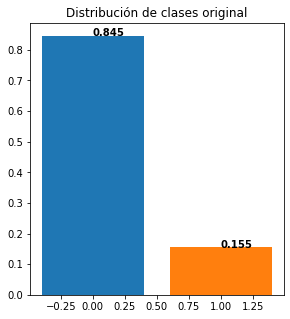

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(0,np.sum(Y==0)/Y.shape[0])
plt.bar(1,np.sum(Y==1)/Y.shape[0])
plt.title('Distribución de clases original')
for i in range(2):
    plt.text(i, np.sum(Y==i)/Y.shape[0], str(round(np.sum(Y==i)/Y.shape[0],3)), color='black', fontweight='bold')

In [26]:
from sklearn.metrics import roc_auc_score

def calculateAUC(clf):
    prob_y_0 = clf.predict_proba(X_test)
    
    prob_y_0 = [p[1] for p in prob_y_0]

    print( roc_auc_score(y_test, prob_y_0) )

In [27]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold

In [29]:
#calculateAUC(clf)

0.8798976997517861


Modelos

In [30]:
skf = StratifiedKFold(n_splits=4)

In [42]:
def make_table(data):
    df = pandas.DataFrame()
    df = df.assign(mean_fit_time = data["mean_fit_time"])

    df = df.assign(params = data["params"])

    df = df.assign(mean_test_AUC = data["mean_test_AUC"])
    df = df.assign(mean_test_F_score = data["mean_test_F-score"])
    df = df.assign(mean_test_Sensitivity = data["mean_test_Sensitivity"])
    df = df.assign(rank_test_AUC = data["rank_test_AUC"])
    df = df.assign(rank_test_F_score = data["rank_test_F-score"])
    df = df.assign(rank_test_Sensitivity = data["rank_test_Sensitivity"])

    df = df.assign(mean_train_AUC = data["mean_train_AUC"])
    df = df.assign(mean_train_F_score = data["mean_train_F-score"])
    df = df.assign(mean_train_Sensitivity = data["mean_train_Sensitivity"])

    return df

Este tiene como medida de desempeño AUC y el accuracy, sólo puse el accuracy como para ver algo, pero en sí se usa sin el accuracy, sólo con el AUC, esa es la prueba que está después de esta.

In [48]:
scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {'svc__kernel':('linear', 'poly', 'sigmoid'),
              'svc__gamma':['scale'],
              'svc__C':(0.001, 0.01, 1, 10)}

pp = make_pipeline(StandardScaler(), SVC(probability = True))

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='F-score', return_train_score=True, n_jobs=-1, verbose=10)

gs.fit(X, Y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed: 16.9min remaining:   43.9s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 17.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel=...
                                            probability=True, random_state=None,
                                            shrinking=True, tol=0.001,
              

In [49]:
results_svc = gs.cv_results_
data = pandas.DataFrame(results_svc)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_AUC,split1_test_AUC,...,split3_test_Sensitivity,mean_test_Sensitivity,std_test_Sensitivity,rank_test_Sensitivity,split0_train_Sensitivity,split1_train_Sensitivity,split2_train_Sensitivity,split3_train_Sensitivity,mean_train_Sensitivity,std_train_Sensitivity
0,40.011196,1.434184,1.213589,0.198066,0.001,scale,linear,"{'svc__C': 0.001, 'svc__gamma': 'scale', 'svc_...",0.970697,0.839589,...,0.253669,0.268344,0.009720,8,0.208945,0.274633,0.334032,0.315164,0.283194,0.047940
1,46.010588,0.406227,1.262536,0.079116,0.001,scale,poly,"{'svc__C': 0.001, 'svc__gamma': 'scale', 'svc_...",0.903156,0.851529,...,0.029350,0.022011,0.007338,11,0.017470,0.020266,0.024458,0.020266,0.020615,0.002495
2,48.948824,1.096042,2.343567,0.225114,0.001,scale,sigmoid,"{'svc__C': 0.001, 'svc__gamma': 'scale', 'svc_...",0.952383,0.853107,...,0.000000,0.000000,0.000000,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,39.745382,2.080913,1.057702,0.241812,0.01,scale,linear,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.966250,0.835507,...,0.327044,0.364260,0.027589,6,0.308176,0.375961,0.433263,0.433962,0.387841,0.051667
4,50.130707,1.595418,1.520653,0.163336,0.01,scale,poly,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.885291,0.848628,...,0.115304,0.074420,0.025525,10,0.061495,0.077568,0.097834,0.088749,0.081412,0.013555
5,51.219475,0.815531,2.683069,0.207297,0.01,scale,sigmoid,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.931649,0.847148,...,0.218029,0.219601,0.007756,9,0.160028,0.214535,0.255066,0.244584,0.218553,0.036919
6,96.269707,22.889794,1.068824,0.191393,1,scale,linear,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...",0.965817,0.835809,...,0.339623,0.391514,0.033126,4,0.322851,0.394829,0.464710,0.452131,0.408630,0.056093
7,51.326718,2.224108,1.194457,0.209341,1,scale,poly,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...",0.852108,0.843723,...,0.425577,0.346431,0.047721,7,0.330538,0.410203,0.438155,0.484277,0.415793,0.055879
8,24.178688,2.981318,1.260144,0.039451,1,scale,sigmoid,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...",0.625320,0.683358,...,0.448637,0.434485,0.021038,1,0.390636,0.418588,0.447939,0.450734,0.426974,0.024468
9,389.273173,124.027194,1.003884,0.213332,10,scale,linear,"{'svc__C': 10, 'svc__gamma': 'scale', 'svc__ke...",0.965871,0.836233,...,0.339623,0.391514,0.033126,4,0.322851,0.394829,0.465409,0.452830,0.408980,0.056404


In [50]:
table_svc = make_table(data)
table_svc

,mean_fit_time,params,mean_test_AUC,mean_test_F_score,mean_test_Sensitivity,rank_test_AUC,rank_test_F_score,rank_test_Sensitivity,mean_train_AUC,mean_train_F_score,mean_train_Sensitivity
0,40.011196,"{'svc__C': 0.001, 'svc__gamma': 'scale', 'svc_...",0.849134,0.399287,0.268344,1,8,8,0.873948,0.414885,0.283194
1,46.010588,"{'svc__C': 0.001, 'svc__gamma': 'scale', 'svc_...",0.839221,0.042729,0.022011,6,11,11,0.883681,0.040283,0.020615
2,48.948824,"{'svc__C': 0.001, 'svc__gamma': 'scale', 'svc_...",0.842535,0.000000,0.000000,5,12,12,0.853601,0.000000,0.000000
3,39.745382,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.844399,0.487738,0.364260,2,4,6,0.868839,0.510337,0.387841
4,50.130707,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.832056,0.135121,0.074420,7,10,10,0.884842,0.149338,0.081412
5,51.219475,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.831313,0.342604,0.219601,8,9,9,0.839334,0.339956,0.218553
6,96.269707,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...",0.844004,0.510040,0.391514,3,1,4,0.867881,0.525761,0.408630
7,51.326718,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...",0.812497,0.459162,0.346431,9,5,7,0.906362,0.559482,0.415793
8,24.178688,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...",0.644190,0.448139,0.434485,12,6,1,0.642793,0.453644,0.426974
9,389.273173,"{'svc__C': 10, 'svc__gamma': 'scale', 'svc__ke...",0.843949,0.510040,0.391514,4,1,4,0.867898,0.526133,0.408980


In [51]:
gs.best_params_

{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {'gradientboostingclassifier__loss':('deviance', 'exponential'), 
              'gradientboostingclassifier__learning_rate':([0.3, 0.2, 0.1, 0.01]), 
              'gradientboostingclassifier__n_estimators':([50, 100, 200, 300]),
             }

pp = make_pipeline(StandardScaler(), GradientBoostingClassifier())

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='F-score', return_train_score=True, n_jobs=-1, verbose=10)

gs.fit(X, Y)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  1.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_...
             param_grid={'gradientboostingclassifier__learning_rate': [0.3, 0

In [81]:
results_gbt = gs.cv_results_
data = pandas.DataFrame(results_gbt)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__learning_rate,param_gradientboostingclassifier__loss,param_gradientboostingclassifier__n_estimators,params,split0_test_AUC,split1_test_AUC,...,split3_test_Sensitivity,mean_test_Sensitivity,std_test_Sensitivity,rank_test_Sensitivity,split0_train_Sensitivity,split1_train_Sensitivity,split2_train_Sensitivity,split3_train_Sensitivity,mean_train_Sensitivity,std_train_Sensitivity
0,1.018934,0.034350,0.051197,7.218690e-03,0.3,deviance,50,{'gradientboostingclassifier__learning_rate': ...,0.980061,0.893875,...,0.626834,0.522001,0.080801,16,0.629630,0.711391,0.742138,0.735150,0.704577,0.044747
1,1.908934,0.034056,0.058595,6.763725e-03,0.3,deviance,100,{'gradientboostingclassifier__learning_rate': ...,0.978085,0.888735,...,0.612159,0.517809,0.071062,22,0.697414,0.780573,0.791055,0.785465,0.763627,0.038407
2,4.236166,0.119706,0.074007,1.589358e-03,0.3,deviance,200,{'gradientboostingclassifier__learning_rate': ...,0.975819,0.890047,...,0.603774,0.514666,0.063907,23,0.773585,0.835779,0.867925,0.862334,0.834906,0.037428
3,6.784479,0.107923,0.109123,1.981880e-02,0.3,deviance,300,{'gradientboostingclassifier__learning_rate': ...,0.972247,0.890363,...,0.612159,0.511520,0.071401,25,0.835779,0.891684,0.916841,0.907757,0.888015,0.031475
4,0.942293,0.037418,0.046877,6.344746e-06,0.3,exponential,50,{'gradientboostingclassifier__learning_rate': ...,0.981410,0.920846,...,0.624738,0.537726,0.063562,3,0.606569,0.685535,0.714885,0.689727,0.674179,0.040616
5,1.797441,0.053532,0.058597,2.030439e-02,0.3,exponential,100,{'gradientboostingclassifier__learning_rate': ...,0.981878,0.919125,...,0.597484,0.527771,0.047975,12,0.635919,0.723270,0.759609,0.732355,0.712788,0.046351
6,4.030110,0.064890,0.062490,1.030919e-05,0.3,exponential,200,{'gradientboostingclassifier__learning_rate': ...,0.981495,0.913181,...,0.593291,0.520433,0.048657,19,0.696716,0.776380,0.819008,0.801537,0.773410,0.046801
7,5.160142,0.111802,0.093746,2.787433e-06,0.3,exponential,300,{'gradientboostingclassifier__learning_rate': ...,0.980849,0.902096,...,0.587002,0.510474,0.055337,26,0.747030,0.822502,0.865129,0.850454,0.821279,0.045520
8,0.949221,0.020303,0.054682,1.354142e-02,0.2,deviance,50,{'gradientboostingclassifier__learning_rate': ...,0.979664,0.895185,...,0.624738,0.528290,0.072939,11,0.607966,0.686233,0.725367,0.701607,0.680294,0.044024
9,1.831514,0.033565,0.058592,2.029400e-02,0.2,deviance,100,{'gradientboostingclassifier__learning_rate': ...,0.979098,0.896087,...,0.612159,0.521479,0.063265,17,0.655486,0.730259,0.767994,0.741440,0.723795,0.041752


In [82]:
table_gbt = make_table(data)
table_gbt

,mean_fit_time,params,mean_test_AUC,mean_test_F_score,mean_test_Sensitivity,rank_test_AUC,rank_test_F_score,rank_test_Sensitivity,mean_train_AUC,mean_train_F_score,mean_train_Sensitivity
0,1.018934,{'gradientboostingclassifier__learning_rate': ...,0.872946,0.544303,0.522001,25,21,16,0.957320,0.758080,0.704577
1,1.908934,{'gradientboostingclassifier__learning_rate': ...,0.870756,0.540353,0.517809,27,24,22,0.969131,0.815212,0.763627
2,4.236166,{'gradientboostingclassifier__learning_rate': ...,0.868728,0.534473,0.514666,28,26,23,0.983424,0.880818,0.834906
3,6.784479,{'gradientboostingclassifier__learning_rate': ...,0.865349,0.528994,0.511520,29,28,25,0.990853,0.926336,0.888015
4,0.942293,{'gradientboostingclassifier__learning_rate': ...,0.888167,0.564358,0.537726,4,2,3,0.957226,0.726937,0.674179
5,1.797441,{'gradientboostingclassifier__learning_rate': ...,0.884061,0.556206,0.527771,10,11,12,0.968761,0.769530,0.712788
6,4.030110,{'gradientboostingclassifier__learning_rate': ...,0.878462,0.546526,0.520433,17,20,19,0.982480,0.827539,0.773410
7,5.160142,{'gradientboostingclassifier__learning_rate': ...,0.873521,0.537298,0.510474,24,25,26,0.990113,0.872008,0.821279
8,0.949221,{'gradientboostingclassifier__learning_rate': ...,0.876137,0.554978,0.528290,19,13,11,0.952377,0.734608,0.680294
9,1.831514,{'gradientboostingclassifier__learning_rate': ...,0.875376,0.548371,0.521479,20,18,17,0.962328,0.778154,0.723795


In [83]:
gs.best_params_

{'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'exponential',
 'gradientboostingclassifier__n_estimators': 100}

In [84]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {'quadraticdiscriminantanalysis__reg_param':([0, 0.001, 0.01, 0.1, 0.6, 1]), 
              'quadraticdiscriminantanalysis__store_covariance':(True,False)}

pp = make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis()) 

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='F-score', return_train_score=True, n_jobs=-1, verbose=10)

gs.fit(X, Y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:    4.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('quadraticdiscriminantanalysis',
                                        QuadraticDiscriminantAnalysis(priors=None,
                                                                      reg_param=0.0,
                                                                      store_covariance=False,
                                                                      tol=0.0001))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'quadraticdiscriminantanalysis__re

In [85]:
results_qda= gs.cv_results_
data = pandas.DataFrame(results_qda)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_quadraticdiscriminantanalysis__reg_param,param_quadraticdiscriminantanalysis__store_covariance,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,...,split3_test_Sensitivity,mean_test_Sensitivity,std_test_Sensitivity,rank_test_Sensitivity,split0_train_Sensitivity,split1_train_Sensitivity,split2_train_Sensitivity,split3_train_Sensitivity,mean_train_Sensitivity,std_train_Sensitivity
0,0.094181,0.007692,0.082813,0.011657,0,True,{'quadraticdiscriminantanalysis__reg_param': 0...,0.848531,0.828068,0.800665,...,0.742138,0.592226,0.115727,1,0.644305,0.591195,0.640112,0.651992,0.631901,0.023885
1,0.074236,0.006767,0.058588,0.006745,0,False,{'quadraticdiscriminantanalysis__reg_param': 0...,0.848531,0.828068,0.800665,...,0.742138,0.592226,0.115727,1,0.644305,0.591195,0.640112,0.651992,0.631901,0.023885
2,0.108742,0.015026,0.083789,0.018004,0.001,True,{'quadraticdiscriminantanalysis__reg_param': 0...,0.848548,0.829036,0.800740,...,0.740042,0.591701,0.115393,3,0.642907,0.589797,0.638714,0.650594,0.630503,0.023885
3,0.117974,0.017152,0.086623,0.008798,0.001,False,{'quadraticdiscriminantanalysis__reg_param': 0...,0.848548,0.829036,0.800740,...,0.740042,0.591701,0.115393,3,0.642907,0.589797,0.638714,0.650594,0.630503,0.023885
4,0.158316,0.009123,0.139785,0.023579,0.01,True,{'quadraticdiscriminantanalysis__reg_param': 0...,0.848644,0.834768,0.801243,...,0.708595,0.581745,0.106326,5,0.635220,0.580014,0.628931,0.638714,0.620720,0.023762
5,0.143254,0.022813,0.080048,0.007533,0.01,False,{'quadraticdiscriminantanalysis__reg_param': 0...,0.848644,0.834768,0.801243,...,0.708595,0.581745,0.106326,5,0.635220,0.580014,0.628931,0.638714,0.620720,0.023762
6,0.097351,0.015519,0.054680,0.007826,0.1,True,{'quadraticdiscriminantanalysis__reg_param': 0...,0.850243,0.846531,0.801359,...,0.645702,0.521474,0.095190,7,0.558351,0.531796,0.584906,0.580713,0.563941,0.021127
7,0.092275,0.022673,0.064995,0.010410,0.1,False,{'quadraticdiscriminantanalysis__reg_param': 0...,0.850243,0.846531,0.801359,...,0.645702,0.521474,0.095190,7,0.558351,0.531796,0.584906,0.580713,0.563941,0.021127
8,0.097658,0.006776,0.046885,0.000008,0.6,True,{'quadraticdiscriminantanalysis__reg_param': 0...,0.873458,0.851085,0.805555,...,0.574423,0.438139,0.102468,9,0.433962,0.436059,0.461915,0.463312,0.448812,0.013830
9,0.098202,0.013419,0.067987,0.005269,0.6,False,{'quadraticdiscriminantanalysis__reg_param': 0...,0.873458,0.851085,0.805555,...,0.574423,0.438139,0.102468,9,0.433962,0.436059,0.461915,0.463312,0.448812,0.013830


In [86]:
table_qda = make_table(data)
table_qda

,mean_fit_time,params,mean_test_AUC,mean_test_F_score,mean_test_Sensitivity,rank_test_AUC,rank_test_F_score,rank_test_Sensitivity,mean_train_AUC,mean_train_F_score,mean_train_Sensitivity
0,0.094181,{'quadraticdiscriminantanalysis__reg_param': 0...,0.820525,0.504882,0.592226,11,5,1,0.845410,0.541456,0.631901
1,0.074236,{'quadraticdiscriminantanalysis__reg_param': 0...,0.820525,0.504882,0.592226,11,5,1,0.845410,0.541456,0.631901
2,0.108742,{'quadraticdiscriminantanalysis__reg_param': 0...,0.820785,0.505032,0.591701,9,3,3,0.845649,0.541363,0.630503
3,0.117974,{'quadraticdiscriminantanalysis__reg_param': 0...,0.820785,0.505032,0.591701,9,3,3,0.845649,0.541363,0.630503
4,0.158316,{'quadraticdiscriminantanalysis__reg_param': 0...,0.822152,0.505637,0.581745,7,1,5,0.846864,0.542564,0.620720
5,0.143254,{'quadraticdiscriminantanalysis__reg_param': 0...,0.822152,0.505637,0.581745,7,1,5,0.846864,0.542564,0.620720
6,0.097351,{'quadraticdiscriminantanalysis__reg_param': 0...,0.824929,0.494459,0.521474,5,7,7,0.846881,0.537770,0.563941
7,0.092275,{'quadraticdiscriminantanalysis__reg_param': 0...,0.824929,0.494459,0.521474,5,7,7,0.846881,0.537770,0.563941
8,0.097658,{'quadraticdiscriminantanalysis__reg_param': 0...,0.834557,0.463247,0.438139,3,9,9,0.847155,0.488946,0.448812
9,0.098202,{'quadraticdiscriminantanalysis__reg_param': 0...,0.834557,0.463247,0.438139,3,9,9,0.847155,0.488946,0.448812


In [87]:
gs.best_params_

{'quadraticdiscriminantanalysis__reg_param': 0.01,
 'quadraticdiscriminantanalysis__store_covariance': True}

In [114]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    algorithm : str
        the algorithm name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian', algorithm = 'kd_tree'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        self.algorithm = algorithm
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel, 
                                      algorithm=self.algorithm).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [130]:
 10 ** np.linspace(0, 1, 10)

array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ])

In [131]:
bandwidths = 10 ** np.linspace(0, 1, 10)
scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)}
parameters = {'kdeclassifier__bandwidth': bandwidths}

pp = make_pipeline(StandardScaler(), KDEClassifier()) 

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='F-score', return_train_score=True, n_jobs=-1, verbose=10) 
gs.fit(X, Y)
results = gs.cv_results_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed: 22.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 22.2min finished


In [132]:
results_kd= gs.cv_results_
data = pandas.DataFrame(results_kd)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kdeclassifier__bandwidth,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,...,split3_test_Sensitivity,mean_test_Sensitivity,std_test_Sensitivity,rank_test_Sensitivity,split0_train_Sensitivity,split1_train_Sensitivity,split2_train_Sensitivity,split3_train_Sensitivity,mean_train_Sensitivity,std_train_Sensitivity
0,0.123743,0.008164,31.727459,0.226179,1,{'kdeclassifier__bandwidth': 1.0},0.894678,0.830510,0.790376,0.774951,...,0.274633,0.223790,0.031737,1,0.366876,0.407407,0.440252,0.441649,0.414046,0.030487
1,0.123992,0.004529,34.466054,0.213743,1.29155,{'kdeclassifier__bandwidth': 1.2915496650148839},0.891654,0.831096,0.801189,0.795670,...,0.174004,0.145176,0.017563,2,0.212439,0.220126,0.259958,0.248777,0.235325,0.019638
2,0.131473,0.017763,37.283573,0.258985,1.6681,{'kdeclassifier__bandwidth': 1.6681005372000588},0.893810,0.833773,0.801525,0.805612,...,0.092243,0.075995,0.009419,3,0.103424,0.109713,0.132075,0.124389,0.117400,0.011387
3,0.114167,0.012134,32.555808,0.126987,2.15443,{'kdeclassifier__bandwidth': 2.154434690031884},0.901172,0.840102,0.805615,0.811767,...,0.046122,0.034590,0.008956,4,0.040531,0.042628,0.053809,0.049616,0.046646,0.005331
4,0.126461,0.019461,31.802794,0.207150,2.78256,{'kdeclassifier__bandwidth': 2.7825594022071245},0.907466,0.847083,0.810753,0.818250,...,0.020964,0.016247,0.004775,5,0.020266,0.020964,0.024458,0.017470,0.020790,0.002489
5,0.125399,0.010837,32.305125,0.182488,3.59381,{'kdeclassifier__bandwidth': 3.5938136638046276},0.912042,0.849152,0.813108,0.821159,...,0.008386,0.007337,0.003779,6,0.006289,0.007687,0.008386,0.007687,0.007512,0.000762
6,0.121087,0.012961,31.558014,0.112034,4.64159,{'kdeclassifier__bandwidth': 4.641588833612778},0.914257,0.848604,0.813908,0.821646,...,0.002096,0.002096,0.002568,7,0.001398,0.001398,0.000699,0.001398,0.001223,0.000303
7,0.117178,0.013531,31.163359,0.218295,5.99484,{'kdeclassifier__bandwidth': 5.994842503189409},0.915414,0.847477,0.814584,0.822821,...,0.000000,0.000000,0.000000,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.109367,0.000006,31.348517,0.172236,7.74264,{'kdeclassifier__bandwidth': 7.742636826811269},0.916126,0.846189,0.814964,0.823610,...,0.000000,0.000000,0.000000,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.115231,0.004605,31.293514,0.130393,10,{'kdeclassifier__bandwidth': 10.0},0.916743,0.845432,0.815206,0.824008,...,0.000000,0.000000,0.000000,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [133]:
table_kd = make_table(data)
table_kd

,mean_fit_time,params,mean_test_AUC,mean_test_F_score,mean_test_Sensitivity,rank_test_AUC,rank_test_F_score,rank_test_Sensitivity,mean_train_AUC,mean_train_F_score,mean_train_Sensitivity
0,0.123743,{'kdeclassifier__bandwidth': 1.0},0.822635,0.333549,0.223790,10,1,1,0.943239,0.578753,0.414046
1,0.123992,{'kdeclassifier__bandwidth': 1.2915496650148839},0.829907,0.240523,0.145176,9,2,2,0.906338,0.376716,0.235325
2,0.131473,{'kdeclassifier__bandwidth': 1.6681005372000588},0.833685,0.138044,0.075995,8,3,3,0.878227,0.209060,0.117400
3,0.114167,{'kdeclassifier__bandwidth': 2.154434690031884},0.839669,0.065942,0.034590,7,4,4,0.864297,0.088813,0.046646
4,0.126461,{'kdeclassifier__bandwidth': 2.7825594022071245},0.845893,0.031702,0.016247,6,5,5,0.859112,0.040661,0.020790
5,0.125399,{'kdeclassifier__bandwidth': 3.5938136638046276},0.848870,0.014461,0.007337,5,6,6,0.856430,0.014896,0.007512
6,0.121087,{'kdeclassifier__bandwidth': 4.641588833612778},0.849609,0.004157,0.002096,4,7,7,0.855848,0.002443,0.001223
7,0.117178,{'kdeclassifier__bandwidth': 5.994842503189409},0.850079,0.000000,0.000000,3,8,8,0.855598,0.000000,0.000000
8,0.109367,{'kdeclassifier__bandwidth': 7.742636826811269},0.850227,0.000000,0.000000,2,8,8,0.855355,0.000000,0.000000
9,0.115231,{'kdeclassifier__bandwidth': 10.0},0.850353,0.000000,0.000000,1,8,8,0.855183,0.000000,0.000000


In [134]:
gs.best_params_

{'kdeclassifier__bandwidth': 1.0}

In [ ]:
from sklearn.neural_network import MLPClassifier

scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {
    'mlpclassifier__hidden_layer_sizes': ((70, 20), (70, 30), (70, 40)),
    'mlpclassifier__max_iter': (250, 500, 700),
    'mlpclassifier__activation': ('identity', 'logistic', 'tanh', 'relu'),
    'mlpclassifier__solver': ('sgd', 'adam'),
    'mlpclassifier__alpha': (0.001, 0.01, 0.1),
    'mlpclassifier__learning_rate': ('constant','adaptive'), 
    'mlpclassifier__random_state':[0]
}

pp = make_pipeline(StandardScaler(), MLPClassifier())

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='AUC', return_train_score=True, n_jobs=-1, verbose=10) 
gs.fit(X, Y)
results = gs.cv_results_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   59.8s


In [ ]:
results_mlp = gs.cv_results_
data = pandas.DataFrame(results_mlp)
data

In [ ]:
table_mlp = make_table(data)
table_mlp

In [ ]:
gs.best_params_

In [97]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {
    'complementnb__alpha': [0, 0.4, 0.5, 0.6, 1],
    'complementnb__fit_prior': (True, False),
    'complementnb__norm': (True, False)
}

pp = make_pipeline(MinMaxScaler(), ComplementNB())

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='F-score', return_train_score=True, n_jobs=-1, verbose=10) 
gs.fit(X, Y)
results = gs.cv_results_

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.3s finished


In [98]:
results_cnb = gs.cv_results_
data = pandas.DataFrame(results_cnb)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_complementnb__alpha,param_complementnb__fit_prior,param_complementnb__norm,params,split0_test_AUC,split1_test_AUC,...,split3_test_Sensitivity,mean_test_Sensitivity,std_test_Sensitivity,rank_test_Sensitivity,split0_train_Sensitivity,split1_train_Sensitivity,split2_train_Sensitivity,split3_train_Sensitivity,mean_train_Sensitivity,std_train_Sensitivity
0,0.034258,0.001295,0.047244,0.006984,0,True,True,"{'complementnb__alpha': 0, 'complementnb__fit_...",0.813963,0.803381,...,0.853249,0.642534,0.179328,11,0.836478,0.450734,0.673655,0.718379,0.669811,0.139773
1,0.036255,0.011507,0.034548,0.003359,0,True,False,"{'complementnb__alpha': 0, 'complementnb__fit_...",0.816455,0.819132,...,0.955975,0.835413,0.107610,1,0.870720,0.839273,0.877009,0.864430,0.862858,0.014325
2,0.035156,0.006772,0.039065,0.013554,0,False,True,"{'complementnb__alpha': 0, 'complementnb__fit_...",0.813963,0.803381,...,0.853249,0.642534,0.179328,11,0.836478,0.450734,0.673655,0.718379,0.669811,0.139773
3,0.054212,0.013631,0.026475,0.005136,0,False,False,"{'complementnb__alpha': 0, 'complementnb__fit_...",0.816455,0.819132,...,0.955975,0.835413,0.107610,1,0.870720,0.839273,0.877009,0.864430,0.862858,0.014325
4,0.035156,0.006764,0.039064,0.007809,0.4,True,True,"{'complementnb__alpha': 0.4, 'complementnb__fi...",0.813820,0.802612,...,0.851153,0.639914,0.180396,13,0.828092,0.447240,0.671558,0.715584,0.665618,0.138401
5,0.046873,0.011056,0.039053,0.007804,0.4,True,False,"{'complementnb__alpha': 0.4, 'complementnb__fi...",0.816521,0.818484,...,0.955975,0.835413,0.107610,1,0.870720,0.839972,0.875611,0.864430,0.862683,0.013698
6,0.060763,0.018033,0.045240,0.007587,0.4,False,True,"{'complementnb__alpha': 0.4, 'complementnb__fi...",0.813820,0.802612,...,0.851153,0.639914,0.180396,13,0.828092,0.447240,0.671558,0.715584,0.665618,0.138401
7,0.056997,0.017936,0.061253,0.008869,0.4,False,False,"{'complementnb__alpha': 0.4, 'complementnb__fi...",0.816521,0.818484,...,0.955975,0.835413,0.107610,1,0.870720,0.839972,0.875611,0.864430,0.862683,0.013698
8,0.054504,0.012627,0.048248,0.004258,0.5,True,True,"{'complementnb__alpha': 0.5, 'complementnb__fi...",0.813757,0.802388,...,0.851153,0.639914,0.180396,13,0.826695,0.444444,0.671558,0.714885,0.664396,0.139032
9,0.063504,0.017629,0.044748,0.002487,0.5,True,False,"{'complementnb__alpha': 0.5, 'complementnb__fi...",0.816530,0.818332,...,0.955975,0.835413,0.107610,1,0.870720,0.839972,0.874913,0.864430,0.862509,0.013536


In [99]:
table_cnb = make_table(data)
table_cnb

,mean_fit_time,params,mean_test_AUC,mean_test_F_score,mean_test_Sensitivity,rank_test_AUC,rank_test_F_score,rank_test_Sensitivity,mean_train_AUC,mean_train_F_score,mean_train_Sensitivity
0,0.034258,"{'complementnb__alpha': 0, 'complementnb__fit_...",0.792167,0.441939,0.642534,11,7,11,0.807121,0.463429,0.669811
1,0.036255,"{'complementnb__alpha': 0, 'complementnb__fit_...",0.797842,0.420761,0.835413,1,11,1,0.812993,0.418521,0.862858
2,0.035156,"{'complementnb__alpha': 0, 'complementnb__fit_...",0.792167,0.441939,0.642534,11,7,11,0.807121,0.463429,0.669811
3,0.054212,"{'complementnb__alpha': 0, 'complementnb__fit_...",0.797842,0.420761,0.835413,1,11,1,0.812993,0.418521,0.862858
4,0.035156,"{'complementnb__alpha': 0.4, 'complementnb__fi...",0.791874,0.441950,0.639914,13,5,13,0.806888,0.464422,0.665618
5,0.046873,"{'complementnb__alpha': 0.4, 'complementnb__fi...",0.797702,0.420606,0.835413,3,17,1,0.812962,0.418882,0.862683
6,0.060763,"{'complementnb__alpha': 0.4, 'complementnb__fi...",0.791874,0.441950,0.639914,13,5,13,0.806888,0.464422,0.665618
7,0.056997,"{'complementnb__alpha': 0.4, 'complementnb__fi...",0.797702,0.420606,0.835413,3,17,1,0.812962,0.418882,0.862683
8,0.054504,"{'complementnb__alpha': 0.5, 'complementnb__fi...",0.791784,0.442446,0.639914,15,1,13,0.806834,0.464271,0.664396
9,0.063504,"{'complementnb__alpha': 0.5, 'complementnb__fi...",0.797661,0.420680,0.835413,5,13,1,0.812953,0.418923,0.862509


In [100]:
gs.best_params_

{'complementnb__alpha': 0.5,
 'complementnb__fit_prior': True,
 'complementnb__norm': True}

In [105]:
from sklearn.naive_bayes import GaussianNB

scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {
    'gaussiannb__var_smoothing': [0.0000000001, 0.00000001, 0.000001, 0.0001, 0.1, 10, 100, 1000, 100000, 1000000, 100000000]
}

pp = make_pipeline(StandardScaler(), GaussianNB())

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='F-score', return_train_score=True, n_jobs=-1, verbose=10) 
gs.fit(X, Y)
results = gs.cv_results_

Fitting 4 folds for each of 11 candidates, totalling 44 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  42 out of  44 | elapsed:    4.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    4.7s finished


In [106]:
results_gnb = gs.cv_results_
data = pandas.DataFrame(results_gnb)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gaussiannb__var_smoothing,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,...,split3_test_Sensitivity,mean_test_Sensitivity,std_test_Sensitivity,rank_test_Sensitivity,split0_train_Sensitivity,split1_train_Sensitivity,split2_train_Sensitivity,split3_train_Sensitivity,mean_train_Sensitivity,std_train_Sensitivity
0,0.079499,0.004940,0.060749,0.004810,1e-10,{'gaussiannb__var_smoothing': 1e-10},0.848756,0.830094,0.800651,0.806303,...,0.823899,0.649351,0.132485,1,0.709294,0.649196,0.689029,0.718379,0.691474,0.026621
1,0.062663,0.000249,0.050786,0.006753,1e-08,{'gaussiannb__var_smoothing': 1e-08},0.848756,0.830094,0.800651,0.806303,...,0.823899,0.649351,0.132485,1,0.709294,0.649196,0.689029,0.718379,0.691474,0.026621
2,0.093762,0.011059,0.076338,0.014632,1e-06,{'gaussiannb__var_smoothing': 1e-06},0.848756,0.830095,0.800651,0.806302,...,0.823899,0.649351,0.132485,1,0.709294,0.649196,0.689029,0.718379,0.691474,0.026621
3,0.121751,0.032900,0.098747,0.017100,0.0001,{'gaussiannb__var_smoothing': 0.0001},0.848759,0.830101,0.800648,0.806298,...,0.823899,0.649351,0.132485,1,0.709294,0.649196,0.689029,0.718379,0.691474,0.026621
4,0.124741,0.015825,0.075324,0.024469,0.1,{'gaussiannb__var_smoothing': 0.1},0.849927,0.834127,0.797387,0.803957,...,0.740042,0.574929,0.120297,5,0.614256,0.568134,0.622642,0.645003,0.612509,0.027976
5,0.121096,0.027891,0.066414,0.017030,10,{'gaussiannb__var_smoothing': 10},0.902410,0.840693,0.807217,0.816855,...,0.008386,0.008909,0.003743,6,0.009783,0.010482,0.009085,0.010482,0.009958,0.000579
6,0.097652,0.024027,0.074227,0.027898,100,{'gaussiannb__var_smoothing': 100},0.917182,0.844509,0.814459,0.824082,...,0.000000,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.089851,0.017025,0.074209,0.012958,1000,{'gaussiannb__var_smoothing': 1000},0.918948,0.845084,0.815406,0.825040,...,0.000000,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.129291,0.013739,0.088745,0.008550,100000,{'gaussiannb__var_smoothing': 100000},0.919126,0.845140,0.815510,0.825148,...,0.000000,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.092042,0.016431,0.080500,0.028086,1000000,{'gaussiannb__var_smoothing': 1000000},0.919129,0.845140,0.815510,0.825150,...,0.000000,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [107]:
table_gnb = make_table(data)
table_gnb

,mean_fit_time,params,mean_test_AUC,mean_test_F_score,mean_test_Sensitivity,rank_test_AUC,rank_test_F_score,rank_test_Sensitivity,mean_train_AUC,mean_train_F_score,mean_train_Sensitivity
0,0.079499,{'gaussiannb__var_smoothing': 1e-10},0.821454,0.495376,0.649351,9,2,1,0.835938,0.516555,0.691474
1,0.062663,{'gaussiannb__var_smoothing': 1e-08},0.821454,0.495376,0.649351,9,2,1,0.835938,0.516555,0.691474
2,0.093762,{'gaussiannb__var_smoothing': 1e-06},0.821454,0.495376,0.649351,8,2,1,0.835938,0.516555,0.691474
3,0.121751,{'gaussiannb__var_smoothing': 0.0001},0.821454,0.495452,0.649351,7,1,1,0.835938,0.516617,0.691474
4,0.124741,{'gaussiannb__var_smoothing': 0.1},0.821353,0.484189,0.574929,11,5,5,0.834098,0.516355,0.612509
5,0.121096,{'gaussiannb__var_smoothing': 10},0.841798,0.017491,0.008909,6,6,6,0.846939,0.019630,0.009958
6,0.097652,{'gaussiannb__var_smoothing': 100},0.850063,0.000000,0.000000,5,7,7,0.854538,0.000000,0.000000
7,0.089851,{'gaussiannb__var_smoothing': 1000},0.851124,0.000000,0.000000,4,7,7,0.855518,0.000000,0.000000
8,0.129291,{'gaussiannb__var_smoothing': 100000},0.851236,0.000000,0.000000,3,7,7,0.855632,0.000000,0.000000
9,0.092042,{'gaussiannb__var_smoothing': 1000000},0.851237,0.000000,0.000000,1,7,7,0.855633,0.000000,0.000000


In [108]:
gs.best_params_

{'gaussiannb__var_smoothing': 0.0001}

In [129]:
from sklearn.ensemble import AdaBoostClassifier

scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {
    'adaboostclassifier__n_estimators': (3, 5, 10, 15, 20, 50),
    'adaboostclassifier__learning_rate': (0.1, 0.15, 0.2, 0.25, 0.5),
    'adaboostclassifier__algorithm': ('SAMME', 'SAMME.R'),
    'adaboostclassifier__random_state': (0, 1)
}

pp = make_pipeline(StandardScaler(), AdaBoostClassifier())

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='F-score', return_train_score=True, n_jobs=-1, verbose=10) 
gs.fit(X, Y)
results = gs.cv_results_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

In [127]:
results_abc= gs.cv_results_
data = pandas.DataFrame(results_abc)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_adaboostclassifier__algorithm,param_adaboostclassifier__learning_rate,param_adaboostclassifier__n_estimators,params,split0_test_AUC,split1_test_AUC,...,split3_test_Sensitivity,mean_test_Sensitivity,std_test_Sensitivity,rank_test_Sensitivity,split0_train_Sensitivity,split1_train_Sensitivity,split2_train_Sensitivity,split3_train_Sensitivity,mean_train_Sensitivity,std_train_Sensitivity
0,0.210407,0.018926,0.112625,0.014590,SAMME,0.1,1,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.962114,0.840824,...,0.651992,0.794567,0.129634,1,0.730957,0.794549,0.834382,0.836478,0.799092,0.042738
1,0.404845,0.065424,0.139534,0.019095,SAMME,0.1,5,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.963083,0.856736,...,0.618449,0.768890,0.150175,11,0.730957,0.794549,0.785465,0.795947,0.776730,0.026731
2,0.408737,0.006303,0.109997,0.014295,SAMME,0.1,10,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.969984,0.856736,...,0.618449,0.744252,0.114405,12,0.626136,0.794549,0.785465,0.795947,0.750524,0.071928
3,0.565251,0.023900,0.177492,0.049731,SAMME,0.1,15,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.973825,0.860533,...,0.618449,0.671390,0.038123,17,0.511530,0.688330,0.785465,0.795947,0.695318,0.114104
4,0.779069,0.051684,0.242261,0.075231,SAMME,0.1,20,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.973825,0.860533,...,0.618449,0.465390,0.275031,25,0.000000,0.688330,0.676450,0.771488,0.534067,0.310510
5,2.144364,0.112788,0.614523,0.056231,SAMME,0.1,50,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.974442,0.891596,...,0.618449,0.418204,0.259764,51,0.378057,0.522013,0.632425,0.569532,0.525507,0.093706
6,0.191374,0.065781,0.134287,0.025834,SAMME,0.25,1,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.962114,0.840824,...,0.651992,0.794567,0.129634,1,0.730957,0.794549,0.834382,0.836478,0.799092,0.042738
7,0.460502,0.091289,0.139001,0.040580,SAMME,0.25,5,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.972798,0.856736,...,0.563941,0.629468,0.078629,18,0.511530,0.688330,0.676450,0.735849,0.653040,0.084670
8,0.486754,0.073828,0.111512,0.022059,SAMME,0.25,10,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.972798,0.869455,...,0.563941,0.451766,0.268381,28,0.000000,0.688330,0.676450,0.735849,0.525157,0.304013
9,0.561256,0.044249,0.145256,0.016949,SAMME,0.25,15,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.972798,0.883423,...,0.651992,0.491064,0.283567,23,0.453529,0.676450,0.740741,0.628931,0.624913,0.106608


In [123]:
gs.best_params_

{'adaboostclassifier__algorithm': 'SAMME',
 'adaboostclassifier__learning_rate': 0.15,
 'adaboostclassifier__n_estimators': 3}

In [131]:
table_abc = make_table(data)
table_abc

,mean_fit_time,params,mean_test_AUC,mean_test_F_score,mean_test_Sensitivity,rank_test_AUC,rank_test_F_score,rank_test_Sensitivity,mean_train_AUC,mean_train_F_score,mean_train_Sensitivity
0,0.210407,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.841200,0.659963,0.794567,51,1,1,0.844582,0.665962,0.799092
1,0.404845,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.851425,0.657874,0.768890,49,11,11,0.852968,0.666585,0.776730
2,0.408737,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.853937,0.655670,0.744252,45,12,12,0.855969,0.664336,0.750524
3,0.565251,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.856433,0.639291,0.671390,39,17,17,0.858755,0.653211,0.695318
4,0.779069,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.856693,0.443687,0.465390,38,25,25,0.882185,0.508378,0.534067
5,2.144364,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.875720,0.423286,0.418204,20,42,51,0.909647,0.594287,0.525507
6,0.191374,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.841200,0.659963,0.794567,51,1,1,0.844582,0.665962,0.799092
7,0.460502,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.854494,0.629237,0.629468,42,18,18,0.856952,0.648421,0.653040
8,0.486754,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.858571,0.441291,0.451766,37,30,28,0.901920,0.506505,0.525157
9,0.561256,"{'adaboostclassifier__algorithm': 'SAMME', 'ad...",0.862219,0.450101,0.491064,30,24,23,0.906274,0.640532,0.624913
